In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving brain_stroke.csv to brain_stroke (4).csv


In [ ]:
df = pd.read_csv("brain_stroke.csv")

In [ ]:
#Veri setine ilk bakış için head fonksiyonunu kulanıyoruz.
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
#Gözlem sayısı ve değişken sayısı için;
df.shape

(4981, 11)

In [ ]:
#Değişkenlerin veri tipleri ve eksik gözlem kontrolü için;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
#Eksik değer olup olmadığını isnull().sum() fonksiyonu ile de kontrol edebiliriz. Eksik değer olsaydı yerini doldurmak veya çıkarmak için gerekli analizlerin yapılması gerekirdi.
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#İstatistiksel ölçüm
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


In [ ]:
#Sütunları kontrol edelim
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#Seçtiğimiz sütundaki benzersiz değerleri göstermek için
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#Yukarıdaki gibi tek tek göstermek yerine beraber gösterimi
df_uniq=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
                 'smoking_status', 'stroke']]

for i in df_uniq.columns:
    print(df_uniq[i].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


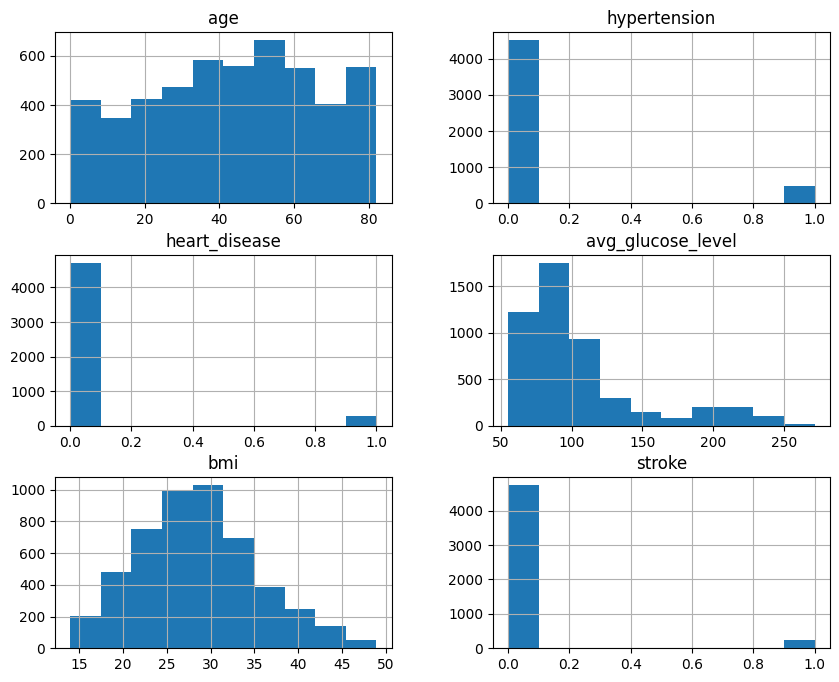

In [ ]:
#Sayısal değişkenlerin dağılımı
df.hist(bins=10, figsize=(10,8))
plt.show()

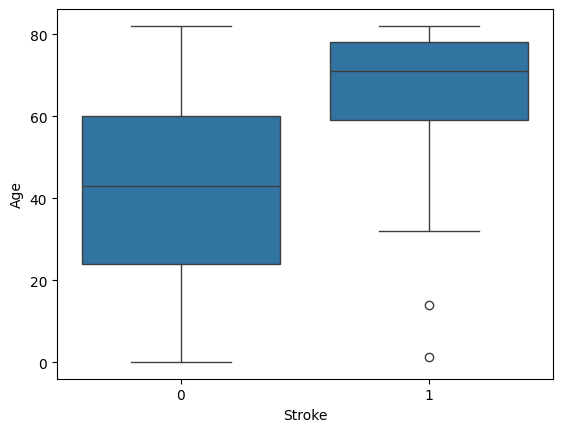

In [ ]:
#Aykırı değerleri gözlemle
sns.boxplot(x='stroke', y='age', data=df)
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

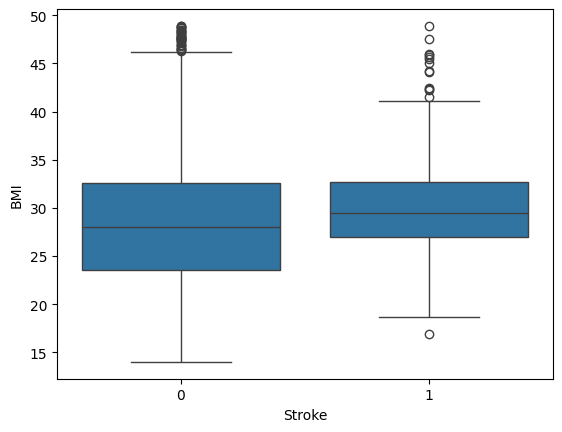

In [ ]:
sns.boxplot(x='stroke', y='bmi', data=df)
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

<ipython-input-53-34d8195791f3>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



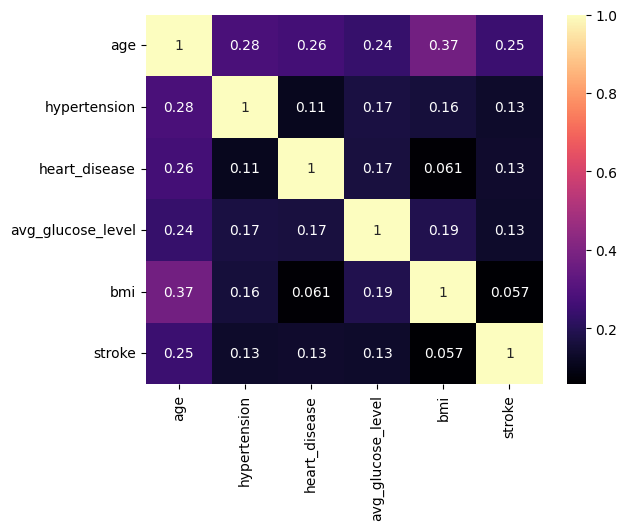

In [ ]:
#Korelasyon Matrisi
sns.heatmap(df.corr(), annot=True, cmap="magma")
plt.show()
